In [1]:
import torch
import torch as t
from autoencoder import AutoEncoder
from stochman import nnj

# Defining network

def encoder(n_hid = 128):
    t.manual_seed(0)
    encoder = nnj.Sequential(
        nnj.Linear(2, n_hid), nnj.ELU(),
        nnj.Linear(n_hid, n_hid), nnj.ELU(),
        nnj.Linear(n_hid, n_hid), nnj.ELU(),
        nnj.Linear(n_hid, n_hid), nnj.ELU(),
        nnj.Linear(n_hid, 1),
    )
    return encoder 

def decoder(n_hid = 128):
    t.manual_seed(0)
    decoder = nnj.Sequential(
        nnj.Linear(1, n_hid), nnj.ELU(),
        nnj.Linear(n_hid, n_hid), nnj.ELU(),
        nnj.Linear(n_hid, n_hid), nnj.ELU(),
        nnj.Linear(n_hid, n_hid), nnj.ELU(),
        nnj.Linear(n_hid, 2)
    )
    return decoder

import matplotlib.pyplot as plt

circle = torch.load("noisy_circle.pt")
parabola = torch.load("noisy_parabola.pt")

experiment_name = 'toy_visualization'
output_dir = experiment_name

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

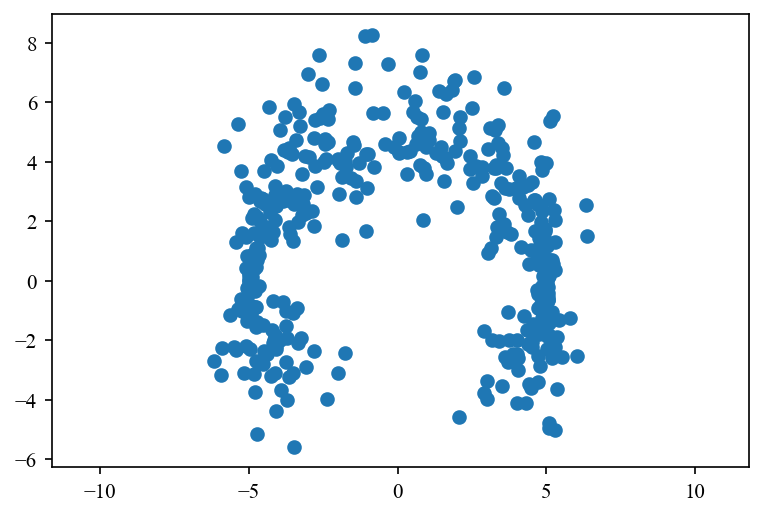

In [3]:
# Sample points along the arc
z = t.linspace(0.7, 2*torch.pi-0.7, 400)

x_data = 5*torch.cat((torch.sin(z).unsqueeze(1), -torch.cos(z).unsqueeze(1)), dim =1)

noise = 1.5*torch.cos(z).unsqueeze(1)*torch.normal(torch.zeros(400,2))

circle = x_data + noise

fig,ax = plt.subplots(dpi = 150)
ax.axis('equal')
ax.scatter(*(circle).T)

In [6]:
# Defining autoencoder
ae = AutoEncoder(0,encoder(), decoder(),lr = 1e-3)
# Training autoencoder without reach regularization
ae.do_train(circle, n_train_iter = 100)
ae.do_train(circle, n_train_iter = 2000)

In [9]:
# Defining autoencoder
ae_2 = AutoEncoder(0,encoder(), decoder(), lr = 1e-3)
# Training autoencoder without reach regularization
ae_2.do_train(circle, n_train_iter = 100)
#Chan
ae_2.alpha = 0.1
ae_2.do_train(circle, n_train_iter = 2000)


In [11]:
ae.save("no_reg_ae_2.pt")
ae_2.save("reach_reg_ae_2.pt")

Warning. The file ({file_path}) already exists - the model will not be saved.
Warning. The file ({file_path}) already exists - the model will not be saved.


In [12]:
ae.load("out/no_reg_ae.pt")
ae_2.load("out/reach_reg_ae.pt")

In [13]:
def ae_curve(ae, data):
    z = torch.linspace(ae.encoder(data).min().item(), ae.encoder(data).max().item(), 1000)
    return ae.decoder(z.unsqueeze(1)).detach()

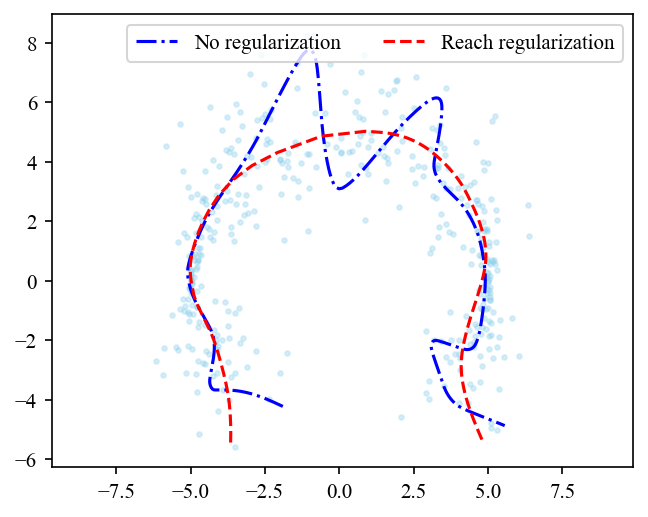

In [14]:
fig, ax = plt.subplots(dpi = 150)
ax.axis('equal')
ax.plot(*ae_curve(ae,circle).T,color = 'blue', linestyle = 'dashdot', label = 'No regularization' )
ax.plot(*ae_curve(ae_2,circle).T, color = 'red', linestyle = 'dashed', label = 'Reach regularization')
#ax.plot(*ae_curve(ae_3,circle).T, color = 'magenta')
ax.scatter(*circle.T, color = 'skyblue', s=5, alpha = 0.3)
fig.set_size_inches(5, 4)
plt.legend(ncol = 2)
fig.savefig('reach-vs-noreg.pdf', format = 'pdf')